# Qui êtes-vous ?
<div class="alert alert-block alert-info">
Écrire ci-dessous le nom, le prénom et le numéro étudiant de chaque membre du binôme :
</div>

# Classification par les k plus proches voisins

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1 - Données

<div class="alert alert-block alert-warning">
Pour illustrer le fonctionnement de l'algorithme des K-moyennes, nous allons utiliser un jeu de données très simple contenu dans <code>base2D.csv</code>. Il correspond à des points dans un espace à 2 dimensions ("X1" et "X2") auxquels est associé un "Label" +1 ou -1, ce label correspond à la classe du point.
</div>
    
<div class="alert alert-block alert-info">
Q1.1 - Charger ce jeu de données dans la variable <code>base2D</code> et visualiser ses premières lignes.
</div>

In [16]:
base2D = pd.read_csv('base-2D.csv')
base2D.head()

,X1,X2,Label
0,0.0,4.0,-1
1,1.0,3.5,-1
2,1.0,1.0,-1
3,2.0,1.0,-1
4,2.0,2.0,-1


<div class="alert alert-block alert-info">
Q1.2 - Isoler dans un tableau <code>numpy</code> que vous nommerez <code>base2D_class</code> la classe de chaque point et dans un autre tableau <code>base2D_data</code> les coordonnées des points. N'oubliez pas d'utiliser la fonction <code>to_numpy()</code> qui permet de convertir une dataframe en tableau numpy.
</div>

In [14]:
base2D_class = np.array(base2D["Label"])
base2D_data = np.array(base2D[["X1", "X2"]])

<div class="alert alert-block alert-warning">
Les coordonnées des points forment ici la description de chaque exemple (un exemple est une ligne du dataset chargé), on dit donc que <code>base2D_data</code> est la matrice des descriptions.
La description d'un exemple est donc un vecteur contenant autant de colonnes que la matrice des descriptions. 
    
    
Le tableau <code>base2D_class</code> est appelé matrice des classes. Chaque ligne coïncide avec la ligne correspondante de la matrice des descriptions.
        
</div>

<div class="alert alert-block alert-info">
Q1.3 - Tracer avec un scatter plot le jeu de données en 2D à partir du tableau <code>base2D_data</code> en coloriant différement chaque type de point selon sa classe.
</div>

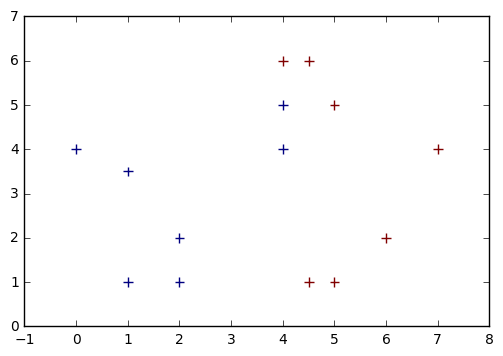

In [53]:
_ = plt.scatter(*base2D_data.T , s = 50, c = base2D_class , marker = "+")

<div class="alert alert-block alert-info">
Q1.4 - Écrire la fonction <code>classe_majoritaire</code> qui, étant donné un array de labels rend la classe majoritaire (celle qui est possédée par le plus grand nombre d'exemples donc...). En cas d'égalité, cette fonction rend la première classe rencontrée.
</div>

<div class="alert alert-block alert-warning">
    Penser à utiliser la fonction numpy <code>unique</code> qui est très utile.
</div>   

In [36]:
# Exemple d'utilisation de la fonction numpy `unique`

valeurs, nb_fois = np.unique(base2D_class, return_counts=True)

print("Valeurs différentes dans l'array           : ",valeurs)
print("Décompte de chaque valeur (respectivement) : ",nb_fois)

Valeurs différentes dans l'array           :  [-1  1]
Décompte de chaque valeur (respectivement) :  [7 7]


In [120]:
from operator import itemgetter

# itemgetter = lambda i: lambda x: x[i]
# itemgetter(i) = x -> x[i]
# itemgetter(2)([3, 1, 7, 4, 6, 5]) = 7

def classe_majoritaire(labels):
    return max(zip(*np.unique(labels, return_counts=True)), key = itemgetter(1))[0]

classe_majoritaire(base2D_class)

-1

## 2 - Algorithme des k-ppv (ou knn)

<div class="alert alert-block alert-warning">
    Le classifieur des $k$-plus proches voisins est très intuitif: il s'agit de prédire la classe majoritaire dans le voisinage d'un point en examinant ses $k$ plus proches voisins (en anglais: $k$ nearest neighbors).
La figure ci-dessous illustre bien le principe général de l'algorithme (cf. page wikipédia si besoin):

<img src='knn.png' width=300px>

Pour prédire la classe ("triangle rouge" ou "carré bleu") de l'exemple représenté par un rond vert, on lui donne la classe qui est majoritaire parmi les $k$ exemples qui sont les plus proches de lui (en choisisant une valeur entière pour $k$, $k$ est un hyperparamètre de l'algorithme). Par exemple, sur l'illustration, on fixe $k=3$, et en regardant les 3 plus proches voisins, on remarque que la classe majoritaire est "triangle rouge" qui est donc la classe que l'on associe à notre exemple inconnu (le rond vert).
</div>

<div class="alert alert-block alert-warning">
Cet algorithme d'apprentissage est particulier: il n'y a pas d'apprentissage, il faut juste stocker tous les points d'apprentissage pour les réutiliser plus tard !! 
En contrepartie, la classification d'un nouvel exemple coute très cher: il faut analyser tout le dataset pour chaque prédiction afin de trouver les $k$ plus proches voisins de l'exemple à prédire.
</div>

<div class="alert alert-block alert-warning">

**Description de l'algorithme:**
    
- pour une description d'exemple $x$ donnée :
    - 1) on construit le tableau des distances entre $x$ et les exemples de $m_{desc}$, 
    - 2) on trie ce tableau grâce à la méthode `numpy.argsort`,
    - 3) la classe rendue est la classe majoritaire parmi les classes des $k$ exemples les plus proches de $x$.

**Remarque**: on considère ici que la distance utilisée est la distance Euclidienne (cela pourrait être une mesure de distance différente selon l'application).
</div>

<div class="alert alert-block alert-info">
Q2.1 - Écrire la fonction <code>classifie_kppv</code> qui prend en argument:
    
- une valeur entière $k>0$ 
    
- un array numpy contenant une matrice de description $m_{desc}$

- un array numpy contenant une matrice de classe (correspondant à la matrice de description) $m_{class}$
    
- un vecteur donnant la description d'un exemple $x$
    
et qui rend la classe de l'exemple $x$ obtenue en appliquant l'algorithme des $k$-ppv.
</div>

<div class="alert alert-block alert-warning">

**Astuce** : comme on ne recherche qu'à ordonner les exemples de $m_{desc}$ selon leur distance à $x$, il n'est pas nécessaire d'appliquer la racine carrée dans le calcul de distance, cela fait gagner un peu de temps de calcul...
</div>

In [217]:
def classifie_kppv(k , m_desc , m_class , x):
    dist = [v @ v for v in m_desc - x]
    kppv = np.argsort(dist)[:k]
    return classe_majoritaire(np.array(m_class)[kppv])

Essayer la fonction dans les cas suivants:

- description (4, 3.5) avec k = 1
- description (4.5, 5) avec k = 1 puis avec k - 3

Vérifier le résultat "à la main" avec l'affichage des exemples de la base2D réalisé précédemment.

In [177]:
# Exemple :
x = np.array([4, 3.5])
classifie_kppv(4, base2D_data, base2D_class, x)

-1

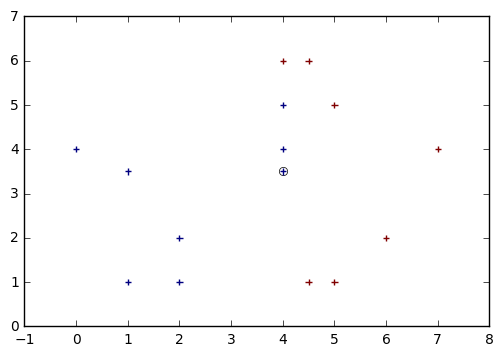

In [178]:
_ = plt.plot(*x, marker = 'o', color = 'white', zorder = 0)
_ = plt.scatter(*np.array([*base2D_data, x]).T, c = list(base2D_class) + [-1], marker='+', zorder=10)

## 3 -  Affichage de la frontière de séparation des classes

<div class="alert alert-block alert-warning">
   Afin de mieux voir le résultat, on peut afficher la frontière de séparation des classes induite par un classifier, cela permet ainsi de voir quelle partie de l'espace de description est associée à chacune des classes.
Un tel tracé ne peut évidemment se faire que lorsque l'espace de description est de taille réduite (2 dimensions pour nous, comme base2D).

Par souci de simplification, on considère un problème de classification binaire.
</div>

In [219]:
def plot_frontiere(m_desc, m_class, func_classif, *args, step=40, **kwargs):
    """ input:
            - m_desc : (np.array) matrice des descriptions
            - m_class : (np.array) matrice des classes (correspondant à m_desc) et à valeurs dans {-1, +1}
            - func_classif : (np.array-> classe) fonction qui prend en argument un vecteur de description à 
              classer et rend la classe associée (qui doit être -1 ou +1). Cette fonction sert de wrapper 
              au classifieur dont on veut tracer la frontière de séparation des classes. 
              voir un exemple dans la boîte suivante.
            - step: finesse du tracé (par défaut 40). Il n'est pas à modifier en général.
            
        output: affiche la frontière de décision associée au classifieur représenté par func_classif
    """
    m_desc = np.array(m_desc)
    m_class = np.array(m_class)
    
    mmax=m_desc.max(0)
    mmin=m_desc.min(0)
    x1grid,x2grid=np.meshgrid(np.linspace(mmin[0],mmax[0],step),np.linspace(mmin[1],mmax[1],step))
    grid=np.hstack((x1grid.reshape(x1grid.size,1),x2grid.reshape(x2grid.size,1)))
    
    # calcul de la prediction pour chaque point de la grille
    res=np.array([func_classif(*args, grid[i,:], **kwargs) for i in range(len(grid)) ])
    res=res.reshape(x1grid.shape)
    # tracer des frontieres
    # colors[0] est la couleur des -1 et colors[1] est la couleur des +1
    plt.contourf(x1grid,x2grid,res,colors=["darksalmon","skyblue"],levels=[-1000,0,1000])
    
    # Ensemble des exemples de classe -1:
    negatifs = m_desc[m_class == -1]
    # Ensemble des exemples de classe +1:
    positifs = m_desc[m_class == +1]
    # Affichage de l'ensemble des exemples :
    plt.scatter(negatifs[:,0],negatifs[:,1],marker='o', color="red") # 'o' rouge pour la classe -1
    plt.scatter(positifs[:,0],positifs[:,1],marker='x', color="blue") # 'x' bleu pour la classe +1

In [184]:
# Exemple de fonction wrapper pour un kppv avec k=1 et les données étudiées
def fonction_kppv1(x):
    """input:
            - x : (np.array) vecteur description (même nombre de colonnes que m_desc et dans même ordre)
        output: classe de x par l'application des k-ppv avec k=1 et la base2D
    """
    return classifie_kppv(1, base2D_data, base2D_class, x)

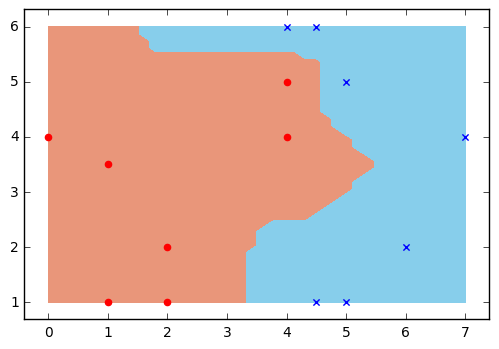

In [185]:
plot_frontiere(base2D_data,base2D_class, classifie_kppv, 1, base2D_data, base2D_class)

<div class="alert alert-block alert-info">
Q3.1 - Afficher la frontière de séparation des classes pour les données base2D en essayant les valeurs de $k$ variant de 1 à 11.
</div>

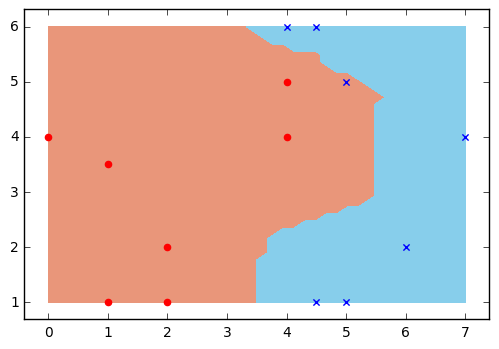

In [187]:
plot_frontiere(base2D_data,base2D_class, classifie_kppv, 2, base2D_data, base2D_class)

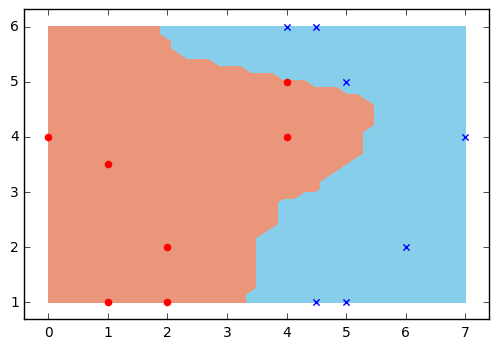

In [188]:
plot_frontiere(base2D_data,base2D_class, classifie_kppv, 3, base2D_data, base2D_class)

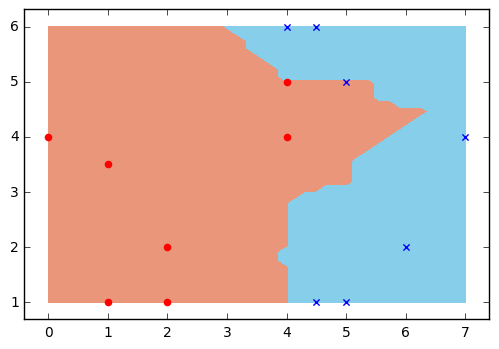

In [189]:
plot_frontiere(base2D_data,base2D_class, classifie_kppv, 4, base2D_data, base2D_class)

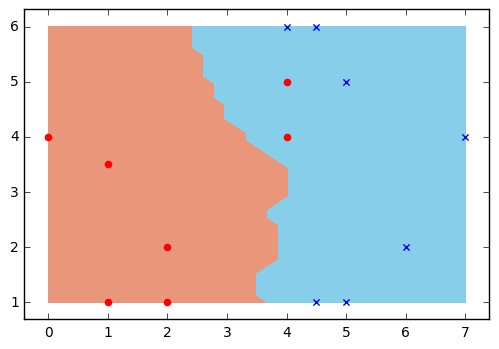

In [190]:
plot_frontiere(base2D_data,base2D_class, classifie_kppv, 5, base2D_data, base2D_class)

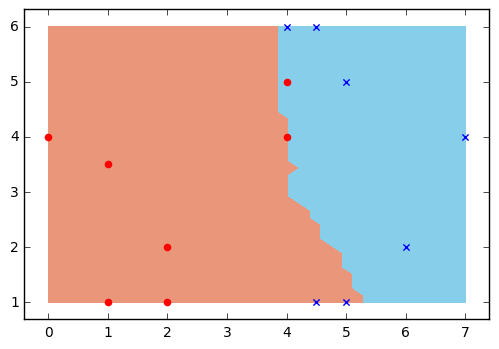

In [191]:
plot_frontiere(base2D_data,base2D_class, classifie_kppv, 6, base2D_data, base2D_class)

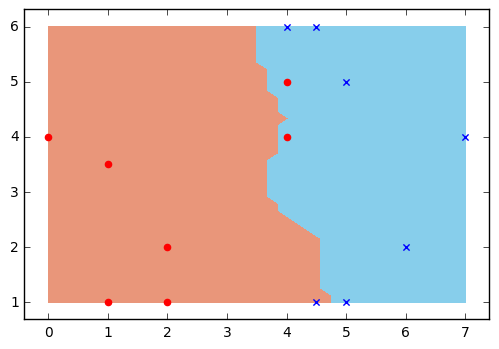

In [192]:
plot_frontiere(base2D_data,base2D_class, classifie_kppv, 7, base2D_data, base2D_class)

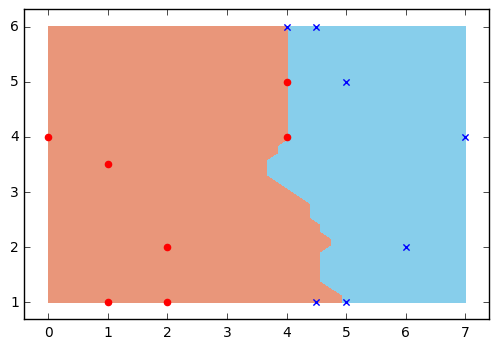

In [193]:
plot_frontiere(base2D_data,base2D_class, classifie_kppv, 8, base2D_data, base2D_class)

### Jeux de données aléatoires

<div class="alert alert-block alert-warning">
    Pour tester l'algorithme des kk plus proches voisins sur des jeux de données plus conséquent, on va générer des données aléatoirement en utilisant la commande <code>numpy.random.multivariate_normal</code> :

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.multivariate_normal.html?highlight=gaussian
    
    
On considère toujours un dataset en 2 dimensions (entrée) et 1 dimension (sortie) comme précédemment.

La façon de procéder avec un tel tirage est la suivante : 
- on commence par tirer aléatoirement tous les exemples de la classe -1
- puis on tire aléatoirement tous les exemples de la classe +1
- on fusionne ces 2 ensembles en les mettant bout à bout
- le tableau des labels est donc facile à construire: d'abord les -1 puis les +1
</div>

<div class="alert alert-block alert-info">
Q3.2 - Écrire la fonction <code>genere_dataset_gaussian</code> qui, étant donné 5 arguments:

- <code>positive_center</code> est le centre de la gaussienne des points positifs (vecteur de taille 2)
- <code>positive_sigma</code> est la variance de la gaussienne des points positifs (sous forme de matrice 2*2)
- <code>negative_center</code> est le centre de la gaussienne des points négative (vecteur de taille 2)
- <code>negative_sigma</code> est la variance de la gaussienne des points négative (sous forme de matrice 2*2)
- <code>nb_points</code> est le nombre de points de chaque classe à générer

rend un dataset généré aléatoirement en suivant une loi normale.
</div>

In [207]:
def genere_dataset_gaussian(positive_center, positive_sigma, negative_center, negative_sigma, nb_points):
    neg = np.random.multivariate_normal(negative_center, negative_sigma, nb_points)
    pos = np.random.multivariate_normal(positive_center, positive_sigma, nb_points)
    return np.array([*neg, *pos]), [-1]*nb_points + [1]*nb_points

<div class="alert alert-block alert-info">
Q3.3 - En utilisant la fonction précédente, créer 2 variables :
    
- <code>data_desc</code> : qui est un tableau de 100 exemples de dimension 2 dont les valeurs pour chaque dimension sont tirées aléatoirement dans l'intervalle [-5,5[ 
- <code>data_label</code> : qui est un tableau de 100 entiers de {-1,+1} tirés aléatoirement de façon uniformes et tel qu'il y ait autant de valeurs +1 que de valeurs -1.
</div>


<div class="alert alert-block alert-warning">
    
**Astuce**: Afin de pouvoir vérifier les résultats obtenus, il est intéressant de fixer une valeur de graine pour la séquence aléatoire. 
Ainsi, dans les exemples qui suivent on a utilisé la valeur 42 comme graine:
        
    np.random.seed(42)   # on prend 42 comme graine
    
avant chaque exécution de la fonction <code>genere_dataset_gaussian</code>.
    
</div>

In [208]:
# Exemple d'utilisation:
np.random.seed(42)   # on prend 42 comme graine

data_desc, data_label = genere_dataset_gaussian(np.array([1,1]),np.array([[1,0],[0,1]]),np.array([-0.5,-1]),np.array([[1,0],[0,1]]),100)

print("Taille du dataset généré :", np.shape(data_desc), "exemples")


Taille du dataset généré : (200, 2) exemples


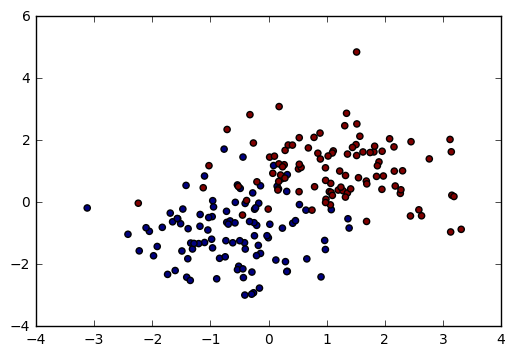

In [209]:
# Exemple:
_ = plt.scatter(data_desc[:,0],data_desc[:,1],c=data_label)

<div class="alert alert-block alert-info">
Q3.4 - Afficher la frontière de séparation des classes pour les données data ainsi générées en essayant différentes valeurs de $k$.
</div>

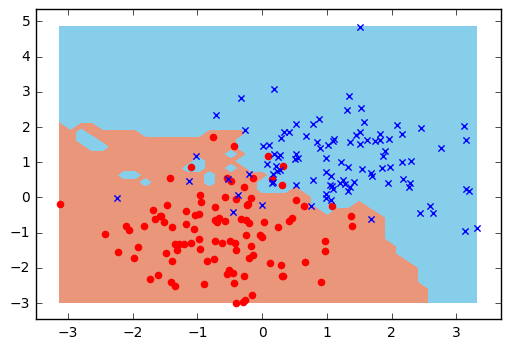

In [220]:
plot_frontiere(data_desc, data_label, classifie_kppv, 3, data_desc, data_label)

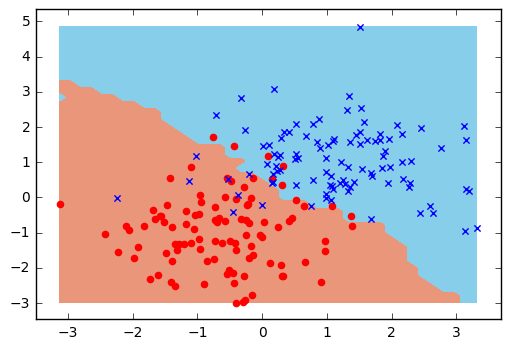

In [221]:
plot_frontiere(data_desc, data_label, classifie_kppv, 8, data_desc, data_label)

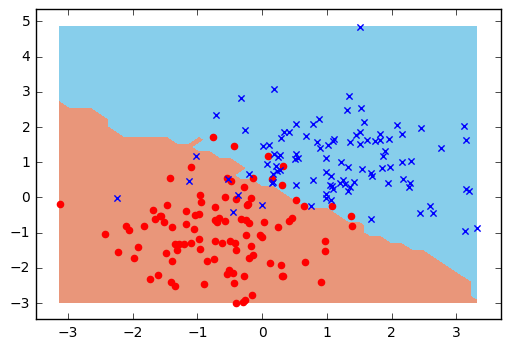

In [222]:
plot_frontiere(data_desc, data_label, classifie_kppv, 12, data_desc, data_label)

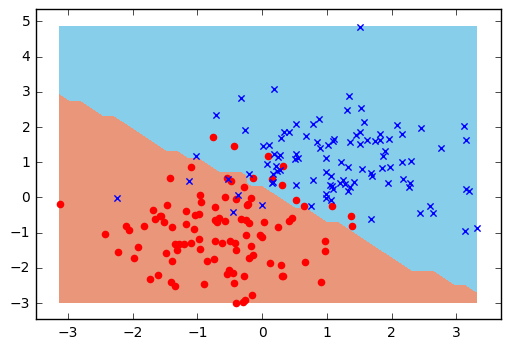

In [223]:
plot_frontiere(data_desc, data_label, classifie_kppv, 50, data_desc, data_label)

## 4 -  Expérimentations

<div class="alert alert-block alert-info">
    Q4.1 - En utilisant la fonction <code>genere_dataset_gaussian</code> avec les mêmes paramètres, générer 2 ensembles de données: <code>data_train</code> contenant 100 exemples de chaque classe, et <code>data_train</code> contenant 50 exemples de chaque classe.
    
Calculer le taux de bonne classification de l'ensemble <code>data_train</code> par un algorithme des $k$ plus proches voisins utilisant les données <code>data_train</code> comme base d'apprentissage.
    
Construire la courbe donnant, pour différentes valeurs de $k$ le taux de bonne classification obtenue et proposer alors une valeur de $k$ qui vous paraît optimale.
</div>

In [235]:
# Exemple d'utilisation:
np.random.seed(42)   # on prend 42 comme graine
data_train_desc, data_train_label = genere_dataset_gaussian(np.array([1,1]),np.array([[1,0],[0,1]]),np.array([-0.5,-1]),np.array([[1,0],[0,1]]),100)
data_test_desc, data_test_label = genere_dataset_gaussian(np.array([1,1]),np.array([[1,0],[0,1]]),np.array([-0.5,-1]),np.array([[1,0],[0,1]]),50)

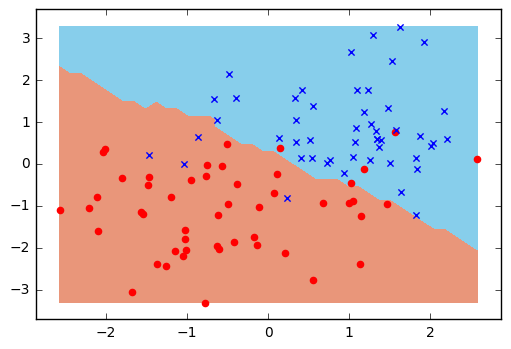

In [244]:
plot_frontiere(data_test_desc, data_test_label, classifie_kppv, 17, data_train_desc, data_train_label)

In [237]:
def taux_erreur(k, classifier, test_desc, test_label, train_desc, train_label):
    err = 0
    for desc, lbl in zip(test_desc, test_label):
        err += classifier(k, train_desc, train_label, desc) != lbl
    return err / len(test_desc)

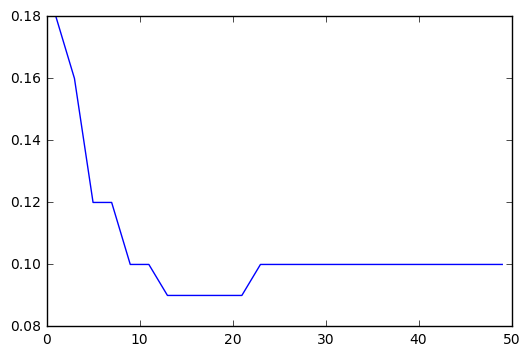

In [242]:
_ = plt.plot(range(1, 50, 2), [taux_erreur(k, classifie_kppv, data_test_desc, data_test_label, data_train_desc, data_train_label) for k in range(1, 50, 2)])

In [243]:
k = 17

<div class="alert alert-block alert-info">

    
Q4.2 - Expérimenter l'algorithme des $k$ plus proches voisins sur des jeux de données réelles.

Par exemple, vous pouvez utiliser les données <code>data_iris</code> fournies avec ce TME. Pour ces données, la description contient 4 colonnes <code>["sepallength","sepalwidth","petallength","petalwidth"]</code> et la classe (de nom <code>"class"</code>) peut prendre 3 valeurs: <code>'Iris-setosa'</code>, <code>'Iris-versicolor'</code> et <code>'Iris-virginica'</code>.

</div>

<div class="alert alert-block alert-warning">
    
**Rappel**: comme dit dans le cours 10, il peut être important de centrer et réduire les données pour des bases de données réelles.
</div>